In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [33]:
np.random.seed(0)

In [34]:
x, y = make_blobs(n_samples = 5000, centers = [[4,4], [-2,-1], [2,-3], [1,1]], cluster_std = 0.9)
print(x)
print(y)

[[-1.82150565  0.07098024]
 [ 2.16732621 -2.93199608]
 [ 0.8465158  -3.26075305]
 ...
 [ 3.29772603  4.24400152]
 [-1.69503125 -0.29979681]
 [-1.64362141  0.63035513]]
[1 2 2 ... 0 1 1]


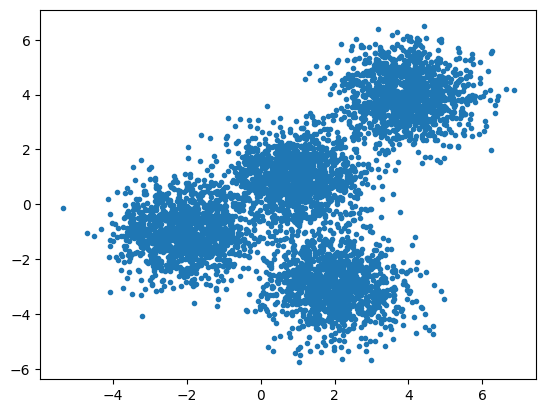

In [35]:
plt.scatter(x[:, 0], x[:, 1], marker = '.')

In [36]:
kmeans = KMeans(init = 'k-means++', n_clusters = 4, n_init = 12)

In [37]:
kmeans.fit(x)

KMeans(n_clusters=4, n_init=12)

In [38]:
kmeans_lables = kmeans.labels_
kmeans_lables

array([0, 3, 3, ..., 1, 0, 0])

In [39]:
kmeans_cluster_center = kmeans.cluster_centers_
kmeans_cluster_center

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

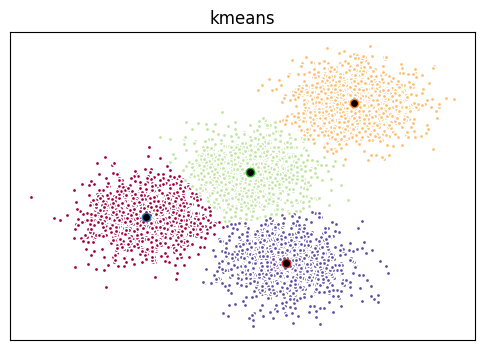

In [40]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize = (6,4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans_lables))))

# Create a plot
ax = fig.add_subplot(1,1,1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2,-1], [2,-3], [1,1]])), colors):
    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (kmeans_lables == k)
    
    # Define the centroid, or cluster center.
    cluster_center = kmeans_cluster_center[k]
    
    # Plots the datapoints with color col.
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor = col, marker = '.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor = 'k', markersize = 6)
    
# Title of the plot    
ax.set_title('kmeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()